In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/branching-factor-and-depth.csv')
data

,numOfPlayers,chanceOfRandom,branchingFactorAvg,branchingFactorMedian,depth
0,2,0.01,15.090909,15.0,22
1,2,0.01,22.000000,24.0,27
2,2,0.01,17.961538,16.0,26
3,2,0.01,16.294118,15.5,34
4,2,0.01,20.074074,19.0,27
...,...,...,...,...,...
1495,4,1.00,21.227273,22.0,110
1496,4,1.00,16.811111,17.0,90
1497,4,1.00,15.100000,15.0,100
1498,4,1.00,18.400000,17.0,140


In [3]:
data.describe()

,numOfPlayers,chanceOfRandom,branchingFactorAvg,branchingFactorMedian,depth
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,3.000000,0.362000,16.261504,15.050333,54.164667
std,0.816769,0.359252,2.965053,3.809021,25.493401
min,2.000000,0.010000,5.872093,2.000000,13.000000
25%,2.000000,0.100000,14.428571,13.000000,38.000000
50%,3.000000,0.200000,16.000000,14.500000,51.000000
75%,4.000000,0.500000,17.902439,17.500000,64.000000
max,4.000000,1.000000,30.370370,33.500000,294.000000


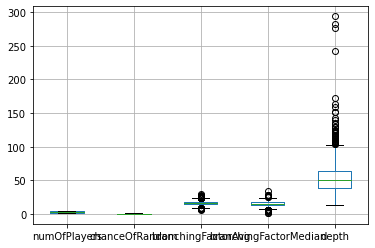

In [4]:
data.boxplot()

In [5]:
outliers = data[data.depth > 100]
outliers

,numOfPlayers,chanceOfRandom,branchingFactorAvg,branchingFactorMedian,depth
33,2,0.01,6.731293,5.0,294
98,2,0.01,9.366197,7.0,142
174,3,0.01,5.872093,4.0,172
208,4,0.01,11.877301,11.0,163
264,4,0.01,13.010601,13.0,283
...,...,...,...,...,...
1487,4,1.00,17.018692,17.0,107
1489,4,1.00,14.853211,13.0,109
1490,4,1.00,13.926606,13.0,109
1495,4,1.00,21.227273,22.0,110


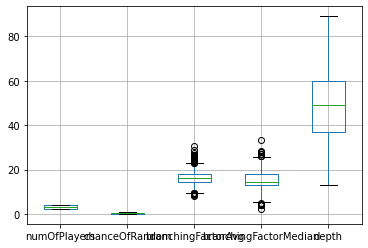

In [6]:
cleaned = data[data.depth < 90]
cleaned.boxplot()

In [7]:
cleaned.groupby(['numOfPlayers','chanceOfRandom']).mean().round()

branchingFactorAvg  branchingFactorMedian  depth
numOfPlayers chanceOfRandom                                                  
2            0.01                          20.0                   18.0   28.0
             0.10                          17.0                   16.0   31.0
             0.20                          17.0                   15.0   29.0
             0.50                          16.0                   14.0   34.0
             1.00                          17.0                   16.0   58.0
3            0.01                          17.0                   18.0   44.0
             0.10                          16.0                   15.0   50.0
             0.20                          16.0                   15.0   52.0
             0.50                          16.0                   15.0   53.0
             1.00                          16.0                   15.0   73.0
4            0.01                          16.0                   14.0   56.0
             0.10                          16.0                   14.0   56.0
             0.20                          15.0                   14.0   57.0
             0.50                          16.0                   14.0   63.0
             1.00                          16.0                   15.0   80.0

In [8]:
def row(name, b, d):
    return [name, b, d, '{:e}'.format(b ** d) ]

rows = [
    row('2 Players', 16, 30),
    row('3 Players', 16, 50),
    row('4 Players', 16, 56),
]
pd.DataFrame(rows, columns=['players','branching factor','depth','complexity'])

,players,branching factor,depth,complexity
0,2 Players,16,30,1.329228e+36
1,3 Players,16,50,1.606938e+60
2,4 Players,16,56,2.695995e+67
